In [1]:
from UCLSE.dyna_q.Experiment1a import Experiment
import numpy as np
import pandas as pd

In [16]:
trader_pref_kwargs={'qty_min':-5,'qty_max':5,'sigma_pv':1}
timer_kwargs={'start':0,'end':5000,'step':1}
price_sequence_kwargs={'kappa':0.0002,'mean':100,'sigma':1,'block_length':10}
noise_kwargs={'sigma':1}
messenger_kwargs={'logging':True}
env_kwargs={'trader_arrival_rate':1,'recording':True,#'process_verbose':False,
                'bookkeep_verbose':False, 'lob_verbose':False}
sigma_n=5

def cont_coef():
    return np.random.uniform(0.2,0.8)

def personal_memory():
    return int(np.random.uniform(5,10))

trader_kwargs={'ZIP':{'prefix':'ZIP','number':10,'object_name':'WW_Zip',
                          'setup_kwargs':
                                {'market_make':True,'prior':(100,sigma_n)}},
               'HBL':{'prefix':'HBL','number':10,'object_name':'HBL',
                          'setup_kwargs':
                              {'memory':100,'grace_period':20}},
               'CON':{'prefix':'CON','number':10,'object_name':'ContTrader',
                      'setup_kwargs':
                          {'cont_coeff':cont_coef,'personal_memory':personal_memory,'profit_target':4, 'market_make':True,
                          'prior':(100,sigma_n)}},
               'NOI':{'prefix':'NOI','number':10,'object_name':'NoiseTrader',
                          'setup_kwargs':{'memory':20}}
              }

lobenv_kwargs={'cutoff':100,'profit_target':10,'loss_limit':-2}

In [17]:
dyna_config={
	"double_q_model": False,
	"batch_size": 128,
	"learning_rate": 5e-3,
	"exploration": {
		"type": "exponential",
		"init_epsilon": 0.8,
		"min_epsilon": 0.05,
		"decay_steps": 100000,
		"decay_eps": 0.99,
        "choice":'least_bonus'
	},
	"memory": {
		"memory_capacity": 1000000,
		"prioritized": False,
        "tabular memory":True,
        
	},
	"discount": 0.99,
	"target_update_freq": 100,
	"first_update": 200,
	"modify_reward": False,
    "learn":'Q',
    'double_q_model':True
    #"clipping":1
    
}

In [18]:
agent_kwargs={'CVAE':True,'latent_dim':2,'recon_weight':0.1,'kl_thresh':0.01,
                   'env_H1Size':32,'env_H2Size':16,'Q_H1Size':32,'Q_H2Size':16,
                   'doneModel':None,'rewardModel':None,'loss_func':None}

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
                               tid      
otype                          Ask   Bid
price time qid oid       qty            
89    31   29  HBL2_31_2 1     NaN  HBL2
91    16   11  ZIP4_16_0 1     NaN  ZIP4
      17   13  HBL4_17_1 1     NaN  HBL4
      24   20  ZIP6_24_0 1     NaN  ZIP6
      29   26  HBL5_29_3 1     NaN  HBL5
93    13   8   ZIP2_13_0 1     NaN  ZIP2
      18   14  HBL6_18_1 1     NaN  HBL6
      34   33  ZIP3_34_0 1     NaN  ZIP3
95    11   4   ZIP1_11_0 1     NaN  ZIP1
      12   6   ZIP5_12_0 1     NaN  ZIP5
      21   17  CON0_21_0 1     NaN  CON0
97    30   27  ZIP8_30_3 1     NaN  ZIP8
98    33   30  CON2_33_0 1     NaN  CON2
102   33   31  CON2_33_1 1    CON2   NaN
103   34   34  ZIP3_34_1 1    ZIP3   NaN
105   16   12  ZIP4_16_1 1    ZIP4   NaN
      24   21  ZIP6_24_1 1    ZIP6   NaN
      30   28  ZIP8_30_4 1    ZIP8   NaN
106   11   5   ZIP1_11_1 1    ZIP1   NaN
      28   25  HBL

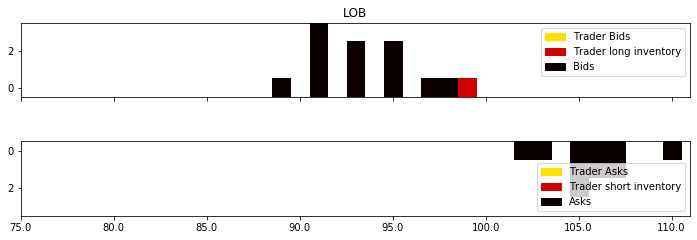

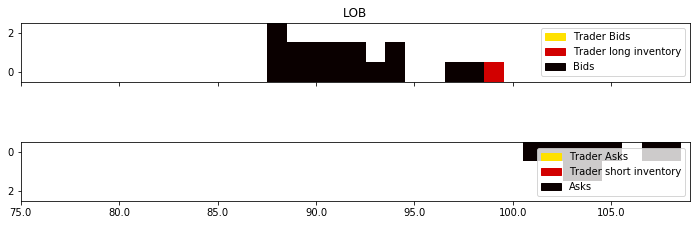

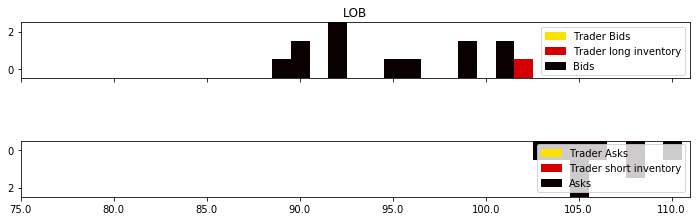

In [19]:
experiment=Experiment(trader_pref_kwargs,timer_kwargs,
           price_sequence_kwargs,noise_kwargs,
           messenger_kwargs,env_kwargs,trader_kwargs,
           lobenv_kwargs,dyna_config,agent_kwargs)

In [20]:
experiment.new_train(MaxEpisodes=1000,K=1,lookback=50,thresh=5,planning=True)

Planning is True, double Q model is True, tabular memory is True
Dyna-Q - EXP  1 | Ep:  1 | timestep:  17 | Ep_r:  -1.056 Avg loss: -1.056
Dyna-Q - EXP  1 | Ep:  11 | timestep:  10 | Ep_r:  -1.064 Avg loss: -1.064
copying eval net to target net
Dyna-Q - EXP  1 | Ep:  21 | timestep:  15 | Ep_r:  -1.044 Avg loss: -1.064
Dyna-Q - EXP  1 | Ep:  31 | timestep:  9 | Ep_r:  -3.072 Avg loss: -1.056
Dyna-Q - EXP  1 | Ep:  41 | timestep:  30 | Ep_r:  -1.984 Avg loss: -1.064
Dyna-Q - EXP  1 | Ep:  51 | timestep:  100 | Ep_r:  -5.0920000000000005 Avg loss: -1.064
Dyna-Q - EXP  1 | Ep:  61 | timestep:  76 | Ep_r:  -3.048 Avg loss: -1.084
Dyna-Q - EXP  1 | Ep:  71 | timestep:  40 | Ep_r:  -1.8079999999999998 Avg loss: -1.1
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP  1 | Ep:  81 | timestep:  100 | Ep_r:  -0.6999999999999997 Avg loss: -1.1
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to R

Dyna-Q - EXP  1 | Ep:  711 | timestep:  33 | Ep_r:  5.5280000000000005 Avg loss: -0.98
copying eval net to target net
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP  1 | Ep:  721 | timestep:  25 | Ep_r:  -0.9539999999999998 Avg loss: -0.9529999999999998
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP  1 | Ep:  731 | timestep:  18 | Ep_r:  0.8680000000000003 Avg loss: -0.9079999999999999
Dyna-Q - EXP  1 | Ep:  741 | timestep:  71 | Ep_r:  3.8760000000000003 Avg loss: -0.7239999999999998
Dyna-Q - EXP  1 | Ep:  751 | timestep:  68 | Ep_r:  -0.9479999999999995 Avg loss: -0.8519999999999999
Dyna-Q - EXP  1 | Ep:  761 | timestep:  15 | Ep_r:  -1.9939999999999998 Avg loss: -0.8699999999999999
Dyna-Q - EXP  1 | Ep:  771 | timestep:  68 | Ep_r:  1.0140000000000005 Avg loss: -0.05199999999999988
Dyna-Q - EXP  1 | Ep:  781 | tim

In [10]:
[l.time for l in experiment.lobenvs]

[32, 64, 53]

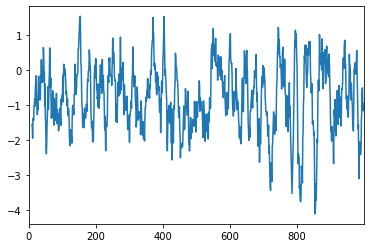

In [11]:
rl=pd.DataFrame(np.array(experiment.rwd_dyna))#.rolling(10).mean().plot()
rl.columns=['reward','time']
#rl=rl.set_index('time')
rl.rolling(10).reward.mean().plot()

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
                               tid      
otype                          Ask   Bid
price time qid oid       qty            
89    5    1   ZIP2_5_0  1     NaN  ZIP2
90    31   21  HBL5_31_1 1     NaN  HBL5
93    19   14  HBL3_19_1 1     NaN  HBL3
      25   18  ZIP3_25_0 1     NaN  ZIP3
94    8    4   ZIP0_8_0  1     NaN  ZIP0
96    11   7   ZIP7_11_0 1     NaN  ZIP7
      26   20  HBL4_26_0 1     NaN  HBL4
      32   22  ZIP8_32_2 1     NaN  ZIP8
      36   24  CON8_36_0 1     NaN  CON8
      37   26  CON7_37_0 1     NaN  CON7
      39   29  CON4_39_0 1     NaN  CON4
99    42   32  HBL1_42_0 1     NaN  HBL1
100   37   27  CON7_37_1 1    CON7   NaN
      39   30  CON4_39_1 1    CON4   NaN
102   8    5   ZIP0_8_1  1    ZIP0   NaN
103   11   8   ZIP7_11_1 1    ZIP7   NaN
104   25   19  ZIP3_25_1 1    ZIP3   NaN
105   15   11  HBL2_15_0 1    HBL2   NaN
      24   17  HBL8_24_0 1    HBL8   NaN
107   32   23  ZIP

adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 81, | timestep:  20 | Ep_r: 4.4259999999999975|profit:0 start:24|end:44
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL tr

adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 171, | timestep:  20 | Ep_r: 1.8800000000000001|profit:0 start:30|end:50
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL t

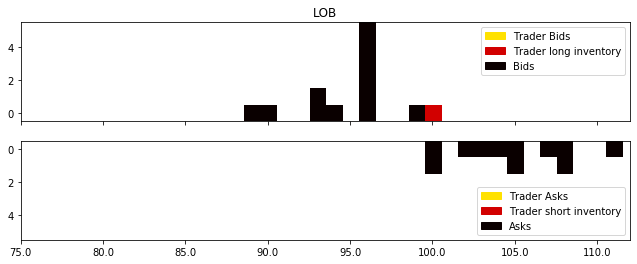

In [12]:
experiment.test_setup(MaxEpisodes=250)

In [13]:
experiment.lobenv_test.trader.balance

0

In [14]:
experiment.rwd_test

[(26, 35, 9, 0, 3.624, 0),
 (26, 59, 42, 1, -1.8719999999999999, 0),
 (66, 100, 76, 2, 0.8320000000000003, 0),
 (59, 79, 96, 3, -5.1240000000000006, 0),
 (44, 89, 141, 4, 0.17600000000000016, 0),
 (26, 34, 149, 5, -0.07199999999999984, 0),
 (26, 45, 168, 6, -7.828, 0),
 (35, 67, 200, 7, -0.8799999999999999, 0),
 (28, 65, 237, 8, -0.006000000000000005, 0),
 (22, 39, 254, 9, -0.1359999999999999, 0),
 (79, 82, 257, 10, -6.042, 0),
 (35, 54, 276, 11, -0.07799999999999985, 0),
 (25, 38, 289, 12, 2.7520000000000002, 0),
 (46, 64, 307, 13, -0.08199999999999985, 0),
 (43, 66, 330, 14, -0.06199999999999983, 0),
 (29, 41, 342, 15, -0.10599999999999987, 0),
 (34, 47, 355, 16, 3.652, 0),
 (38, 54, 371, 17, 3.664, 0),
 (39, 59, 391, 18, -2.1239999999999997, 0),
 (106, 110, 395, 19, -3.088, 0),
 (91, 109, 413, 20, -3.932, 0),
 (36, 53, 430, 21, -0.1359999999999999, 0),
 (40, 64, 454, 22, -1.008, 0),
 (51, 71, 474, 23, 0.07600000000000029, 0),
 (33, 56, 497, 24, -2.0620000000000003, 0),
 (31, 68, 534

In [15]:
experiment.lobenv_test.trader.blotter

{'RL_40_1': [{'tid': 'RL',
   'otype': 'Bid',
   'client_price': 100,
   'order_qty': 1,
   'order_issue_time': 40,
   'accession_time': 40,
   'qid': 45.0,
   'oid': 'RL_40_1',
   'exec_time': 40,
   'exec_qty': 1,
   'exec_price': 100,
   'profit': 0,
   'improvement': 0,
   'BS': 'Buy',
   'status': 'complete'}]}